In [1]:
import numpy as np
import pandas as pd
from sympy.polys.ring_series import rs_square

In [2]:
income = pd.read_csv("Income Dataset.csv")

In [3]:
income.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
income.Salary.describe()

count         10.000000
mean      249500.000000
std       299373.883668
min        45000.000000
25%        65000.000000
50%       130000.000000
75%       275000.000000
max      1000000.000000
Name: Salary, dtype: float64

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
income

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [32]:
x = income["Level"].values
y = income["Salary"].values

In [33]:
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


In [29]:
print(y)

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


In [83]:
X = np.array(x).reshape(10, 1)

In [84]:
print(X.shape)
print(X)

(10, 1)
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [85]:
Y = np.array(y).reshape(10, 1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [86]:
model = LinearRegression()

In [87]:
model.fit(X, Y)

LinearRegression()

In [89]:
val = model.predict([[90000]])

In [90]:
int(val)

/var/folders/d8/5fg8mrrj6ldfhylhx_fn14ch0000gn/T/ipykernel_37977/49578755.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(val)


7278895575

In [91]:
X1 = income.iloc[:, 1:-1].values
y1 = income.iloc[:, -1].values
print(X1)
print(y1)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [92]:
model1 = LinearRegression()

In [93]:
model1.fit(X1, y1)

LinearRegression()

In [96]:
val2 = model1.predict([[90000]])

In [97]:
type(val2)

numpy.ndarray

In [98]:
val2.shape

(1,)

In [99]:
val2[0]

np.float64(7278895575.757577)

In [101]:
model.predict([[11]])

array([[694333.33333333]])

In [166]:
lst = []
for i in range(10):
    lst.append(model.predict([[i]])[0][0])
lst

[np.float64(-195333.33333333337),
 np.float64(-114454.54545454548),
 np.float64(-33575.7575757576),
 np.float64(47303.030303030275),
 np.float64(128181.81818181818),
 np.float64(209060.60606060608),
 np.float64(289939.3939393939),
 np.float64(370818.1818181819),
 np.float64(451696.9696969697),
 np.float64(532575.7575757576)]

In [173]:
upper = np.sum([np.square(x - y) for x, y in zip(y, lst)])
lower = np.sum([np.square(x) for x in (y - np.mean(y))])

upper

np.float64(332372571166.2076)

In [174]:
lower

np.float64(806622500000.0)

In [175]:
r_squared = 1 - upper / lower

In [176]:
r_squared  # Determines how well our model is doing

np.float64(0.5879453261392937)

np.float64(0.0)

In [177]:
from sklearn.preprocessing import PolynomialFeatures

model_poly = PolynomialFeatures(degree=2)
X_poly = model_poly.fit_transform(X)
model2 = LinearRegression()
model2.fit(X_poly, Y)

LinearRegression()

In [181]:
model2.predict(model_poly.fit_transform([[1]]))

array([[118727.27272727]])

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [183]:
import matplotlib.pyplot as plt

%matplotlib inline

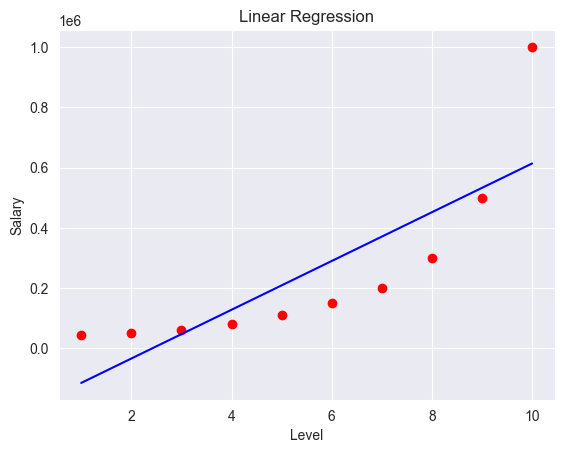

In [184]:
plt.scatter(X, y, color="red")
plt.plot(X, model.predict(X), color="blue")
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

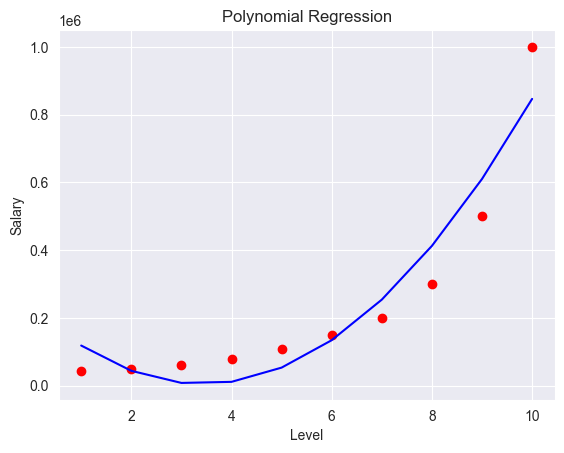

In [185]:
plt.scatter(X, y, color="red")
plt.plot(X, model2.predict(model_poly.fit_transform(X)), color="blue")
plt.title("Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [198]:
print(y for x, y in model2.predict([[y]]) for y in range(10))

ValueError: Found array with dim 3. LinearRegression expected <= 2.

In [190]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [203]:
z = model2.predict(model_poly.fit_transform(X))

In [219]:
result = pd.DataFrame((x[0], y[0]) for x, y in zip(Y, z))

In [234]:
result[0].values

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [235]:
result[1].values

array([118727.27272727,  44151.51515152,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

,0,1
